# Kinematics One Valid Pairing 

**Key idea** When we revisited these plots, it appeared that there were three populations in the massplane plot for the one valid pairing case, so we kind of wanted to just take a look at why this was!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
import pickle
import json
import ROOT
from root_numpy import root2array 

import os
os.sys.path.append('../../hh4b-background-estimation/hep_ml')

Welcome to JupyROOT 6.14/04


In [2]:
basefileName = "../../hh4b-resolved-reconstruction/{}_topo_2016triggers.root"
data16 = pd.DataFrame(root2array(basefileName.format("data16"),"fullmassplane"))

In [3]:
%%bash
pwd

/gpfs/slac/atlas/fs1/d/nhartman/diHiggs4b/sensitivityStudy


Let's identify these three regions!

In [4]:
fig, ax = plt.subplots(1,1,figsize=(5,5))

mBins = 33
mhRanges=[(45,210)]*2

loc=(52,195)

bkg_mask = (data16.ntag == 2) & (data16.nValidPairs == 1) 
plt.hist2d(data16.loc[bkg_mask,"m_h1"],data16.loc[bkg_mask,"m_h2"],
           mBins,mhRanges,cmap="YlGnBu")

plt.text(*loc,"1 valid pairing")

plt.xlabel('$m_{HC1}$ [GeV]',fontsize=16)
plt.ylabel('$m_{HC2}$ [GeV]',fontsize=16)

plt.title('2b 2016 data')

plt.savefig('figures/2b_data16_1validPair/massplane.pdf',bbox_inches='tight')

x1, y1  = 137,115
rx1,ry1 = 20,20
C1 = patches.Ellipse((x1, y1),2*rx1,2*ry1,color="hotpink",
                linewidth=2,fill=False)
ax.add_patch(C1)

x2, y2  = 140,62
rx2,ry2 = 25,13.5
C2 = patches.Ellipse((x2,y2),2*rx2,2*ry2,color="plum",
                linewidth=2,fill=False)
ax.add_patch(C2)

x3, y3  = 65,62
rx3,ry3 = 13.5,13.5
C3 = patches.Ellipse((x3,y3),2*rx3,2*ry3,color="orange",
                linewidth=2,fill=False)
ax.add_patch(C3)

plt.savefig('figures/2b_data16_1validPair/massplane_circles.pdf',bbox_inches='tight')

plt.show()

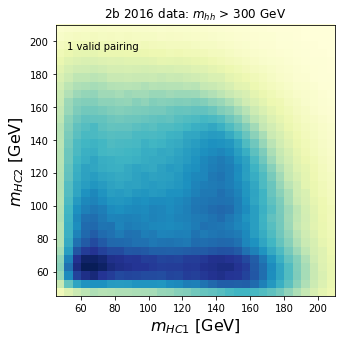

In [5]:
fig, ax = plt.subplots(1,1,figsize=(5,5))

bkg_mask = (data16.ntag == 2) & (data16.nValidPairs == 1)  
plt.hist2d(data16.loc[bkg_mask & (data16.m_hh > 300),"m_h1"],data16.loc[bkg_mask & (data16.m_hh > 300) ,"m_h2"],
           mBins,mhRanges,cmap="YlGnBu")

plt.text(*loc,"1 valid pairing")

plt.xlabel('$m_{HC1}$ [GeV]',fontsize=16)
plt.ylabel('$m_{HC2}$ [GeV]',fontsize=16)

plt.title('2b 2016 data: $m_{hh}$ > 300 GeV')

plt.savefig('figures/2b_data16_1validPair/massplane_mhh>300.pdf',bbox_inches='tight')

plt.show()

Ok, lets make some masks and look at plots!

**Note confusing notation**

$\Delta R_{jj1}$ is the opening angle between the *closest* 2 selected jets, and $\Delta R_{jj2}$ is the opening angle between the *other* two jets. These are here as the variables to use in the reweighting.

First off: Sanity check, let's just make sure these formulas for the ellipses are *right*!

In [6]:
fig, ax = plt.subplots(1,1,figsize=(5,5))

nPoints=50000

S1 = (np.power((data16.m_h1-x1)/rx1,2) + np.power((data16.m_h2-y1)/ry1,2) < 1)
S2 = (np.power((data16.m_h1-x2)/rx2,2) + np.power((data16.m_h2-y2)/ry2,2) < 1)
S3 = (np.power((data16.m_h1-x3)/rx3,2) + np.power((data16.m_h2-y3)/ry3,2) < 1)

for S,color in zip([S1,S2,S3],["hotpink","plum","orange"]):
    
    plt.scatter(data16.loc[bkg_mask&S,"m_h1"][:nPoints],data16.loc[bkg_mask&S,"m_h2"][:nPoints],0.1,
                color=color,alpha=0.1)

plt.text(*loc,"1 valid pairing")

plt.xlabel('$m_{HC1}$ [GeV]',fontsize=16)
plt.ylabel('$m_{HC2}$ [GeV]',fontsize=16)

plt.xlim(mhRanges[0])
plt.ylim(mhRanges[1])

plt.title('2b 2016 data')

plt.savefig('figures/2b_data16_1validPair/circles.png',bbox_inches='tight' )

plt.show()

Now let's overlay the distributions!

In [7]:
cols = ['njets', 'm_hh','pt_hh','X_wt','m_hh_cor',
        'm_h1','E_h1','pT_h1','eta_h1','phi_h1',
        'm_h2','E_h2','pT_h2','eta_h2','phi_h2',
        'm_h1_j1','E_h1_j1','pT_h1_j1','eta_h1_j1','phi_h1_j1','tag_h1_j1',
        'm_h1_j2','E_h1_j2','pT_h1_j2','eta_h1_j2','phi_h1_j2','tag_h1_j2',
        'm_h2_j1','E_h2_j1','pT_h2_j1','eta_h2_j1','phi_h2_j1','tag_h2_j1',
        'm_h2_j2','E_h2_j2','pT_h2_j2','eta_h2_j2','phi_h2_j2','tag_h2_j2',
        'pT_4','pT_2','eta_i','dRjj_1','dRjj_2']

nBins = [7,50,50,50,50,
         50,50,50,50,50,
         50,50,50,50,50,
         50,50,50,50,50,2,
         50,50,50,50,50,2,
         50,50,50,50,50,2,
         50,50,50,50,50,2,
         50,50,50,50,50,2,
         50,50,50,50,50]
        
myRanges = [(3.5,10.5),(0,600),(0,150),(0,8),(0,1200),
            (40,180),(0,1000),(0,400),(-2.5,2.5),(-np.pi,np.pi),
            (40,180),(0,1000),(0,400),(-2.5,2.5),(-np.pi,np.pi),
            (0,40),(0,500),(0,250),(-2.5,2.5),(-np.pi,np.pi),(-0.5,1.5),
            (0,40),(0,500),(0,250),(-2.5,2.5),(-np.pi,np.pi),(-0.5,1.5),
            (0,40),(0,500),(0,250),(-2.5,2.5),(-np.pi,np.pi),(-0.5,1.5),
            (0,40),(0,500),(0,250),(-2.5,2.5),(-np.pi,np.pi),(-0.5,1.5),
            (0,125),(0,200),(0,2.5),(0,np.pi),(0,np.pi)]


/cvmfs/sft.cern.ch/lcg/views/LCG_94python3/x86_64-slc6-gcc8-opt/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


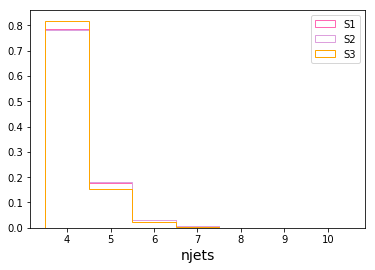

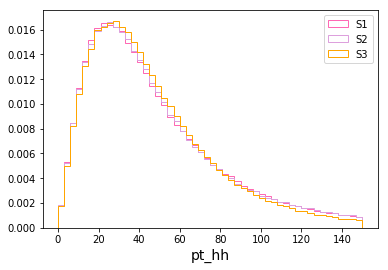

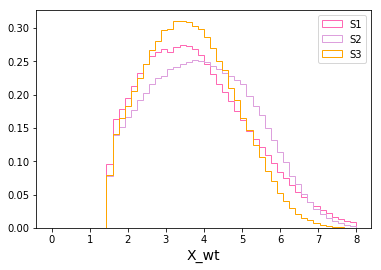

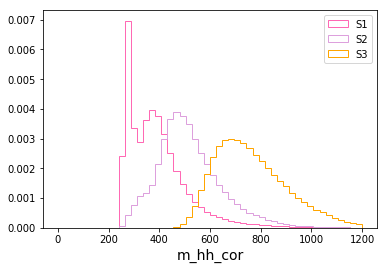

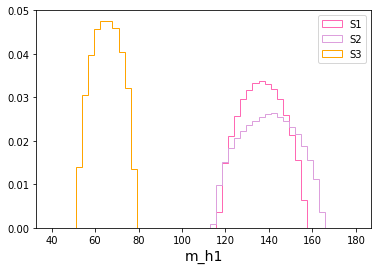

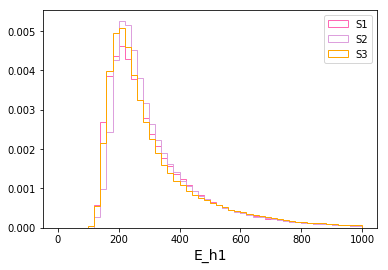

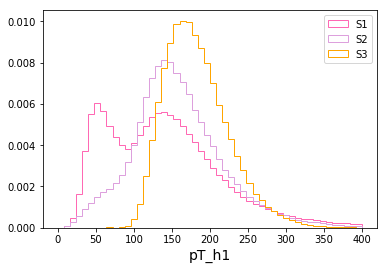

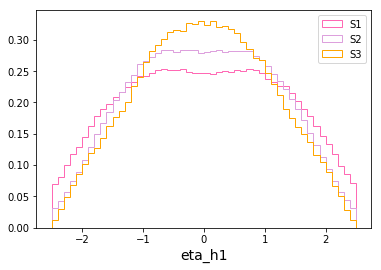

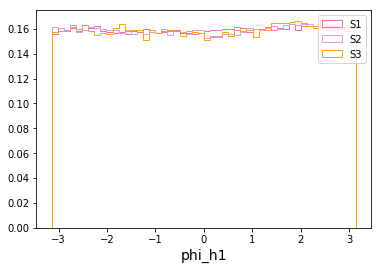

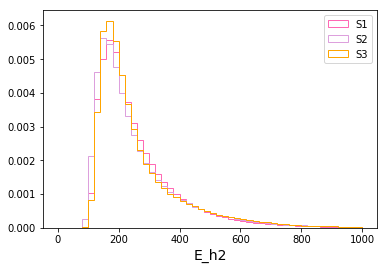

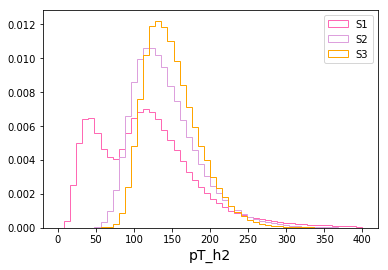

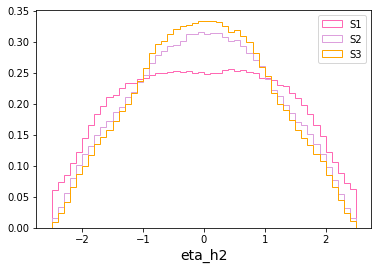

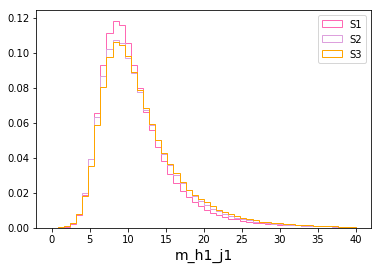

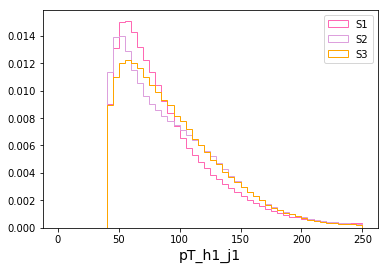

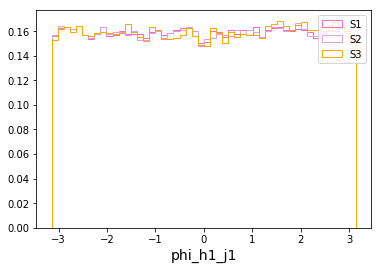

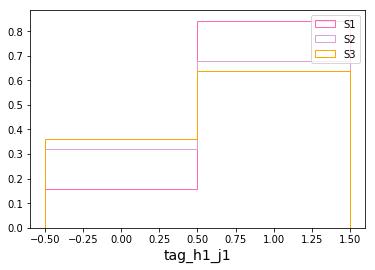

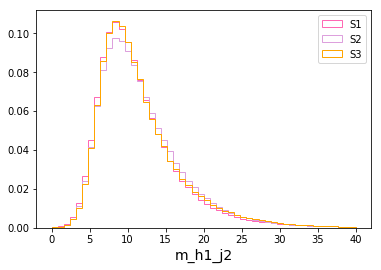

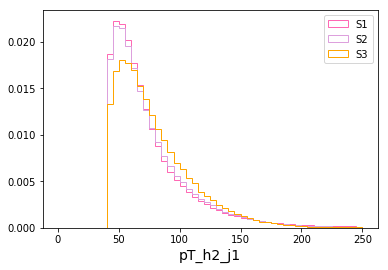

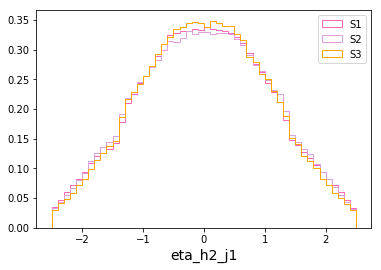

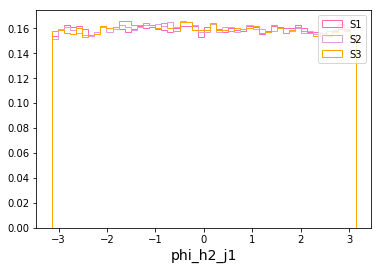

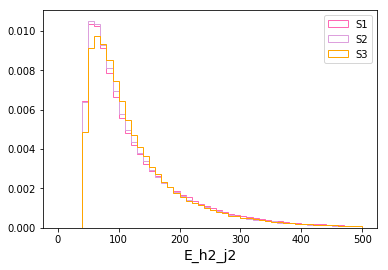

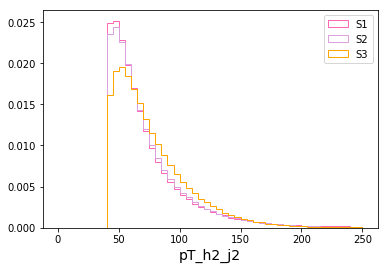

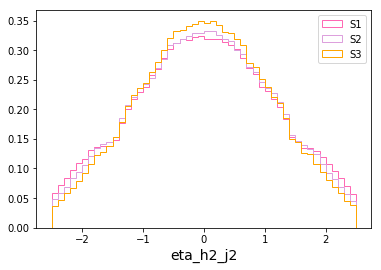

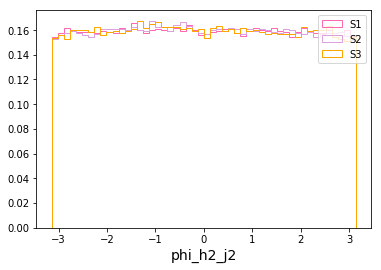

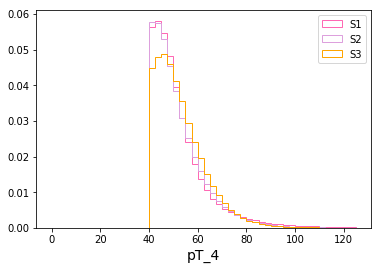

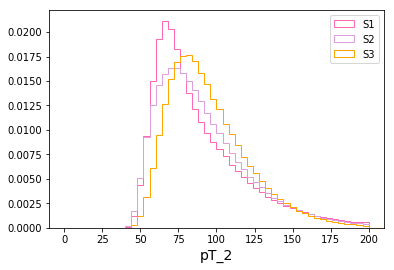

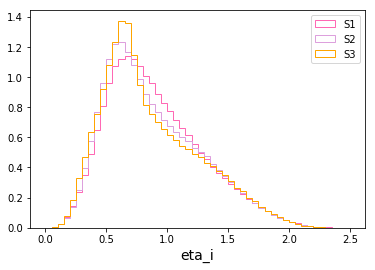

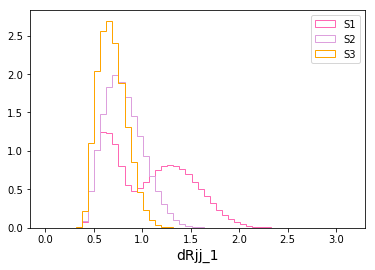

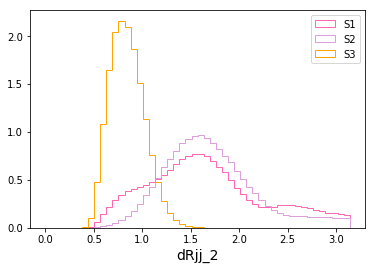

In [8]:
for c,nb,r in zip(cols,nBins,myRanges):
    plt.figure()
    
    for S,color,l in zip([S1,S2,S3],["hotpink","plum","orange"],['S1','S2','S3']):    
        plt.hist(data16.loc[bkg_mask & S,c], nb, r,
                 color=color, histtype='step', label=l, density=True)
        
    plt.xlabel(c,fontsize=14)
    plt.legend()
    plt.savefig('figures/2b_data16_1validPair/{}.pdf'.format(c),bbox_inches='tight')
    
plt.show()

**Also overlay the curve for *not* inside any of these circles**

/cvmfs/sft.cern.ch/lcg/views/LCG_94python3/x86_64-slc6-gcc8-opt/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


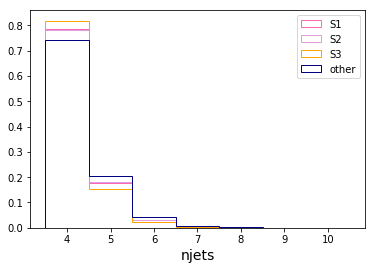

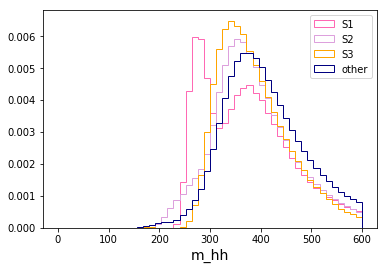

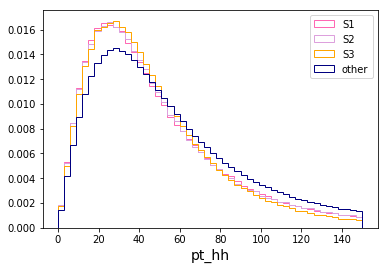

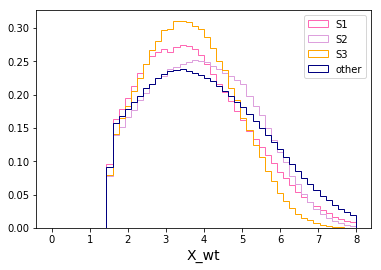

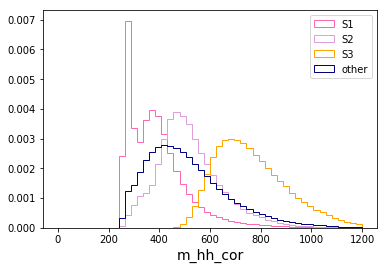

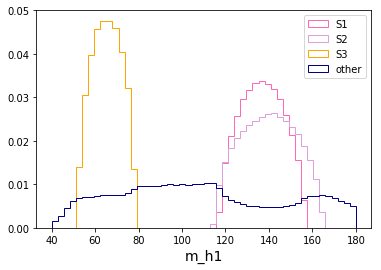

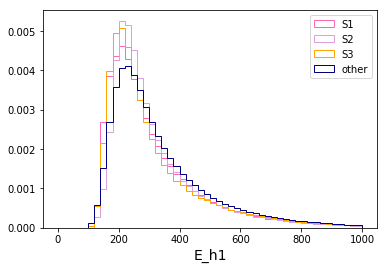

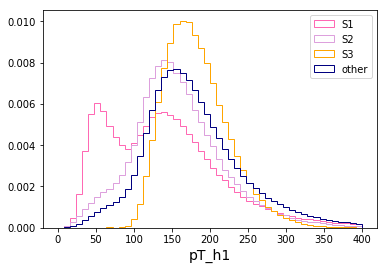

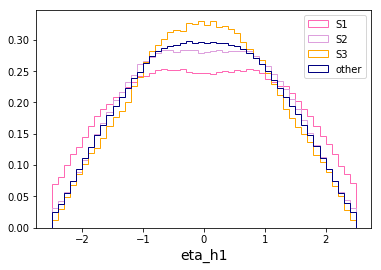

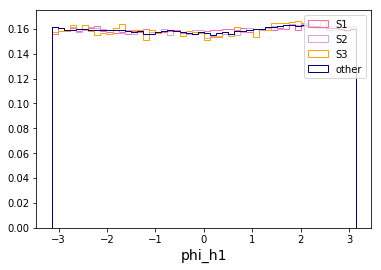

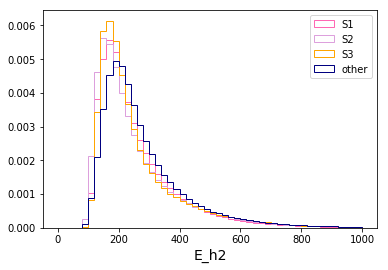

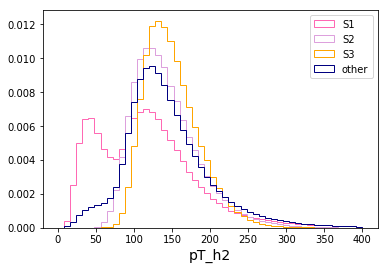

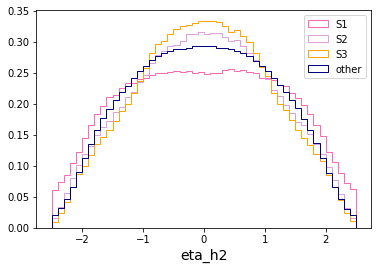

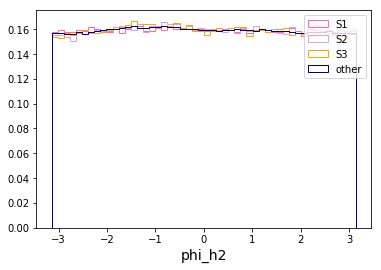

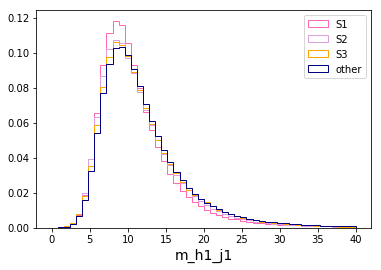

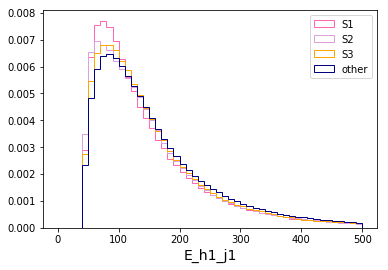

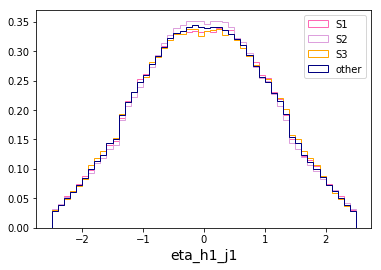

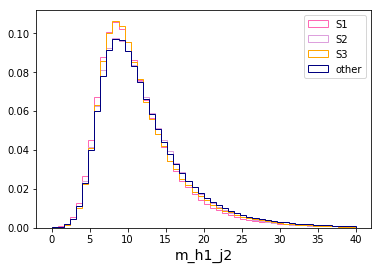

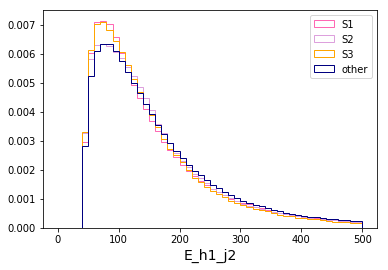

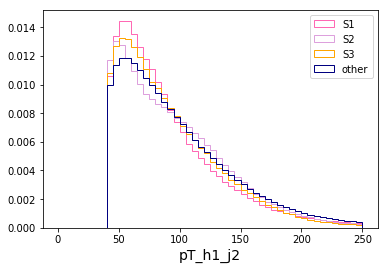

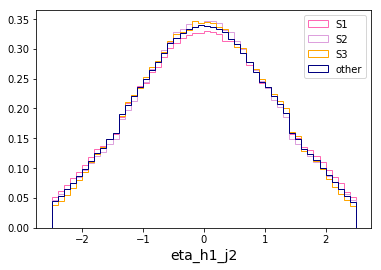

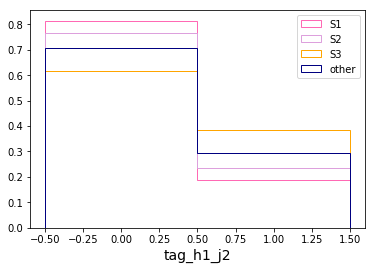

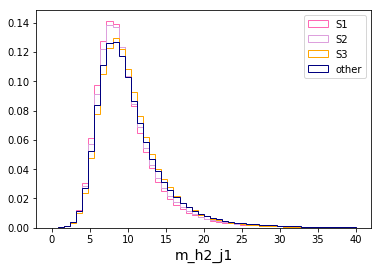

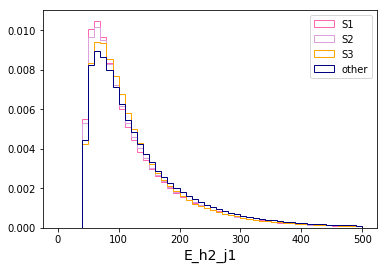

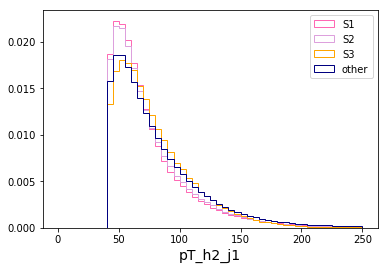

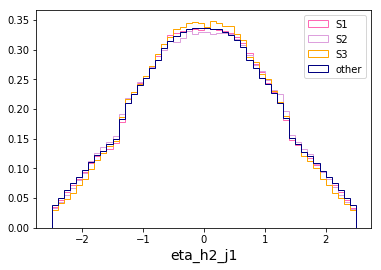

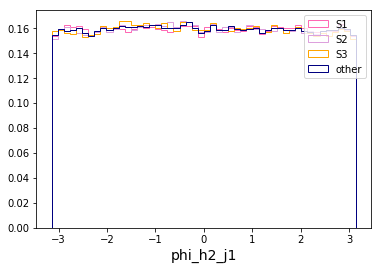

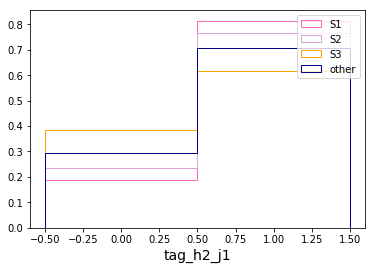

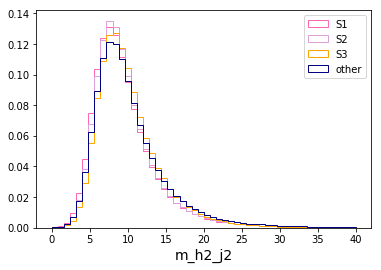

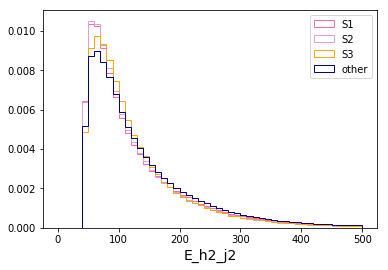

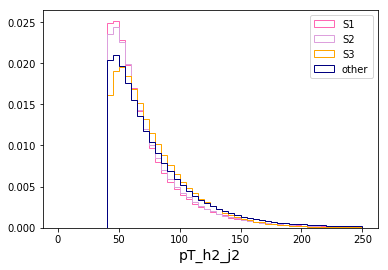

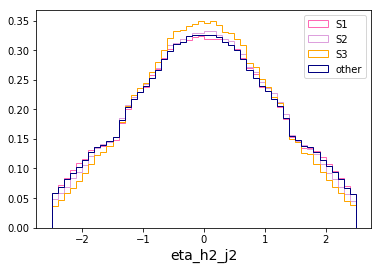

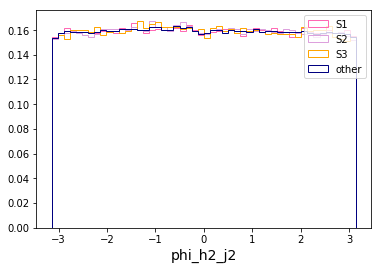

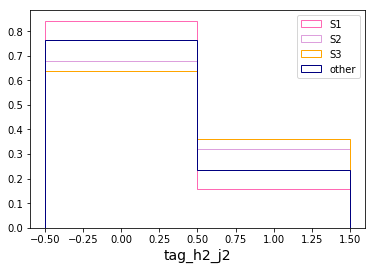

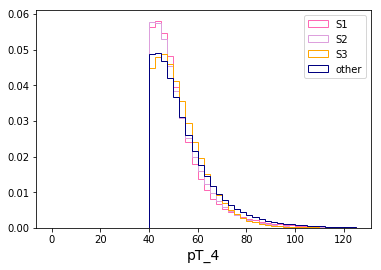

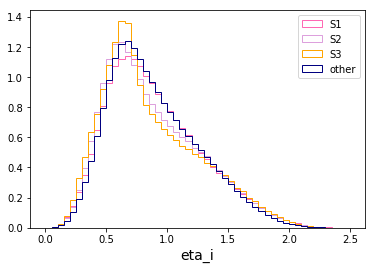

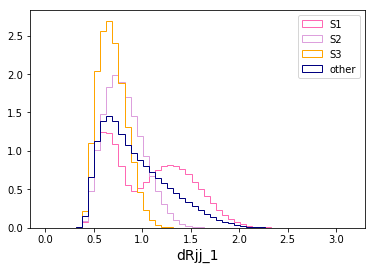

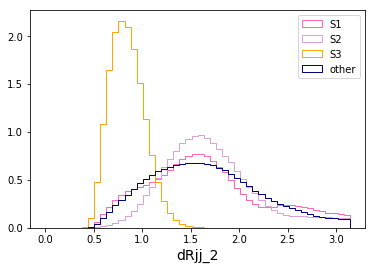

In [9]:
notS = (~S1) & (~S2) & (~S3)

for c,nb,r in zip(cols,nBins,myRanges):
    plt.figure()
    
    for S,color,l in zip([S1,S2,S3,notS],["hotpink","plum","orange",'navy'],['S1','S2','S3','other']):    
        plt.hist(data16.loc[bkg_mask & S,c], nb, r,
                 color=color, histtype='step', label=l, density=True)
        
    plt.xlabel(c,fontsize=14)
    plt.legend()
    plt.savefig('figures/2b_data16_1validPair/{}_notS.pdf'.format(c),bbox_inches='tight')
    
plt.show()

Finally, Rafael wanted me to compare with the S1 for the signal too - I'm just not sure if he wanted me to do it for the category with 2bs or not.

In [10]:
smnr = pd.DataFrame(root2array(basefileName.format("smnr"),"fullmassplane"))

In [11]:
sig_S1 = (np.power((smnr.m_h1-x1)/rx1,2) + np.power((smnr.m_h2-y1)/ry1,2) < 1)

/cvmfs/sft.cern.ch/lcg/views/LCG_94python3/x86_64-slc6-gcc8-opt/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


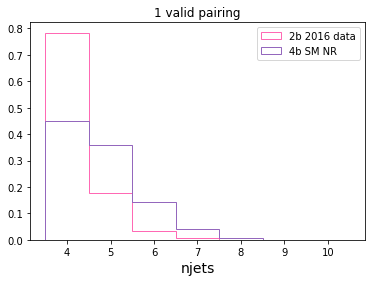

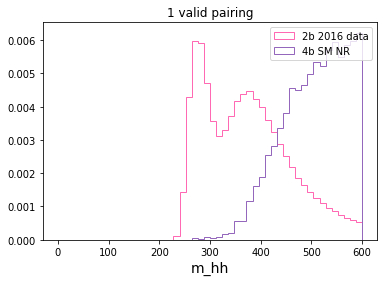

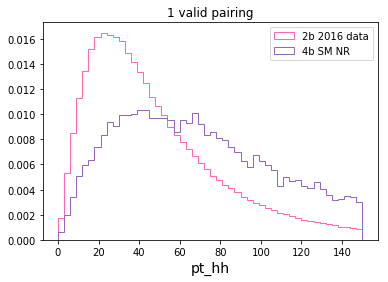

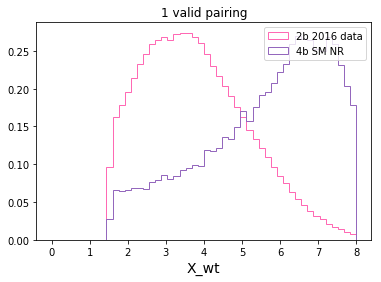

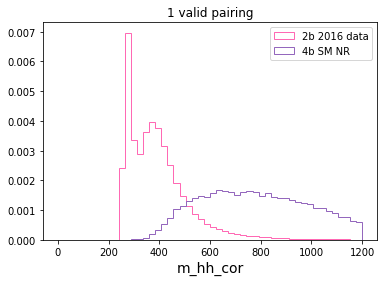

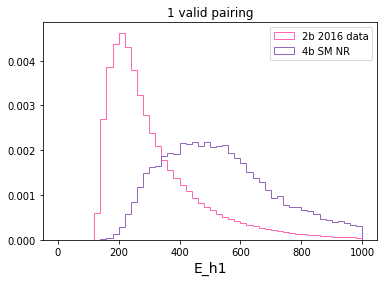

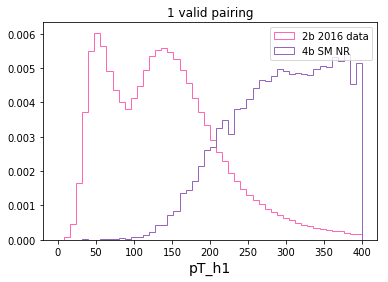

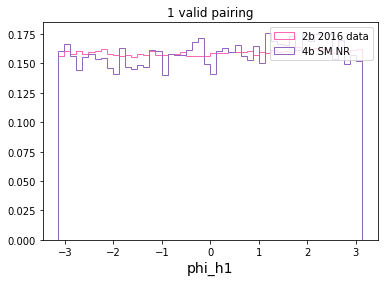

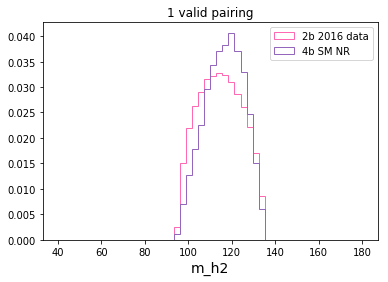

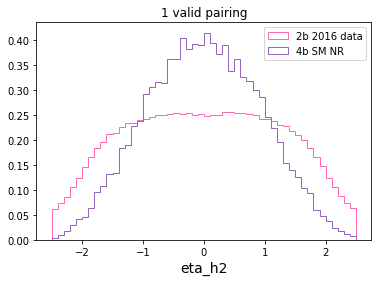

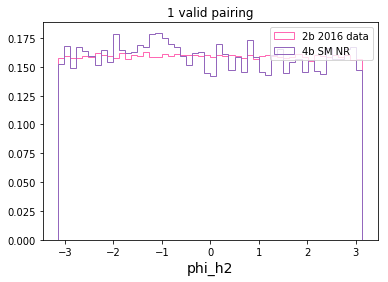

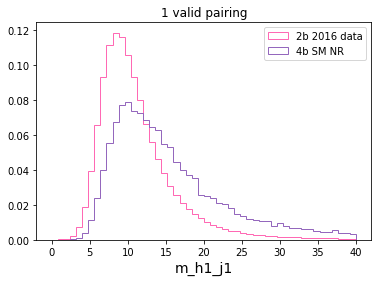

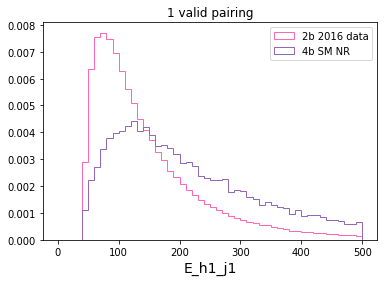

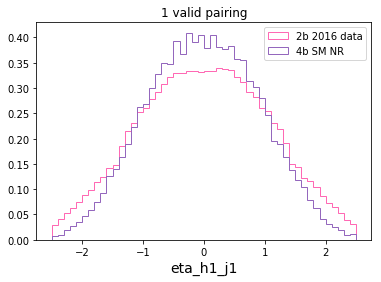

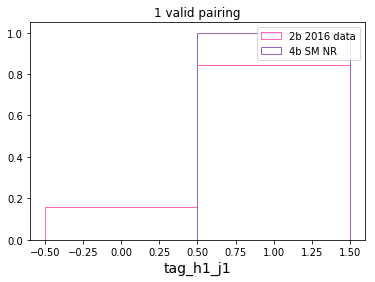

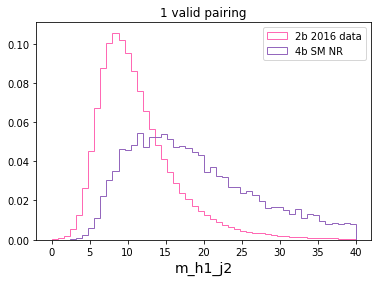

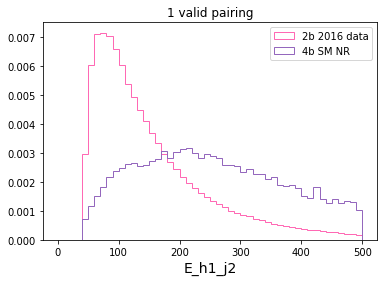

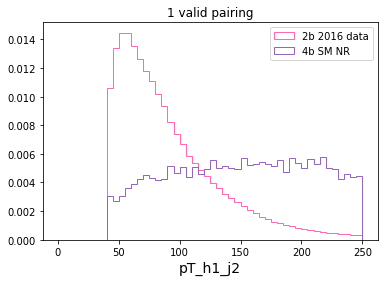

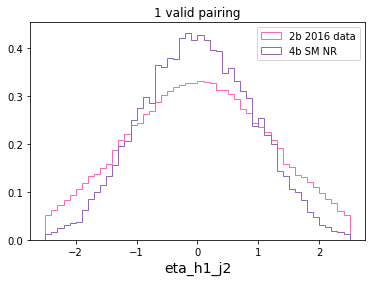

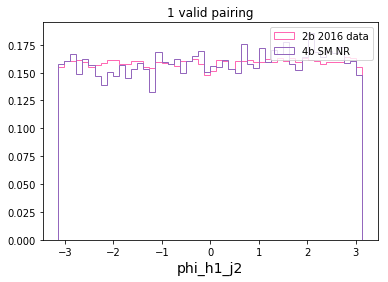

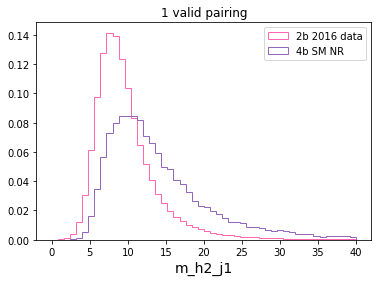

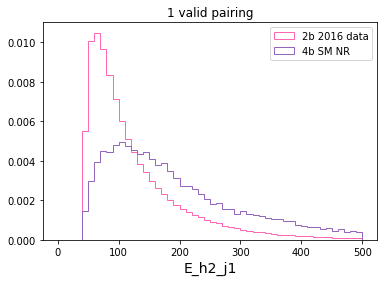

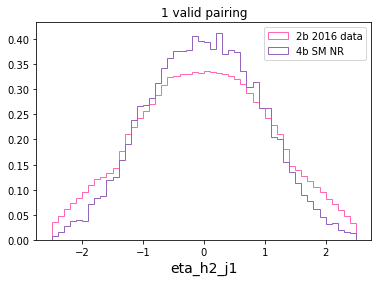

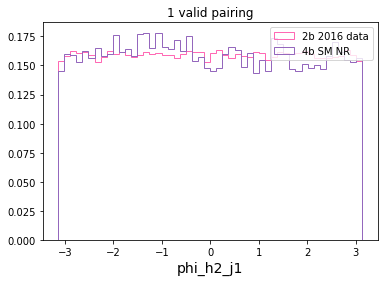

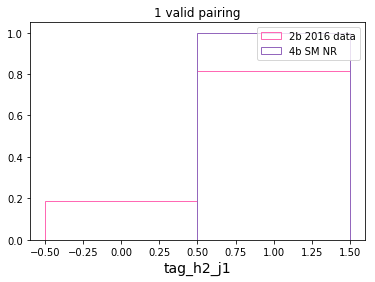

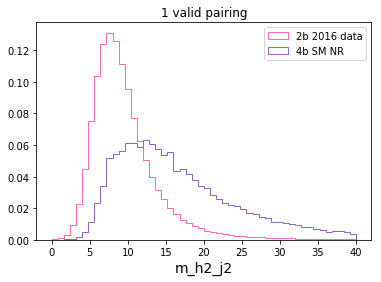

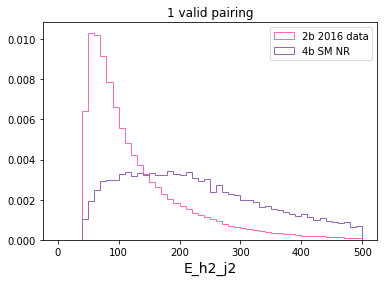

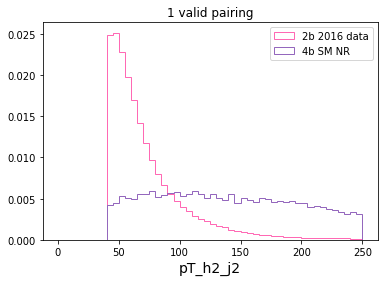

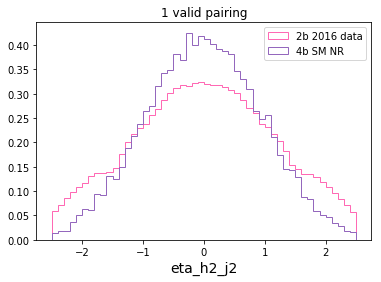

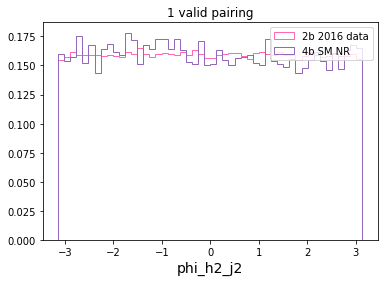

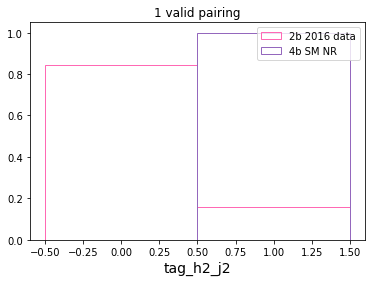

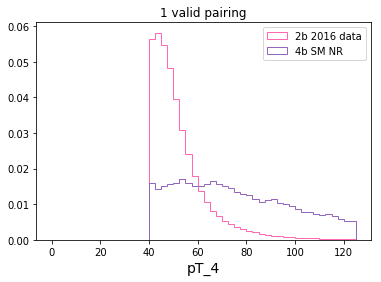

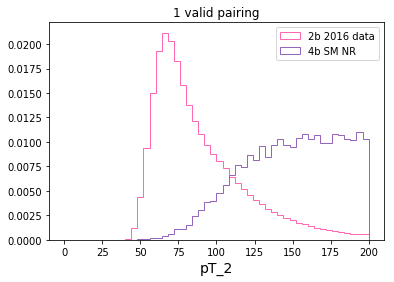

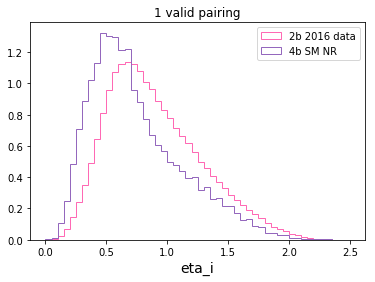

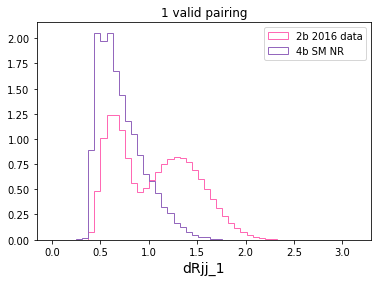

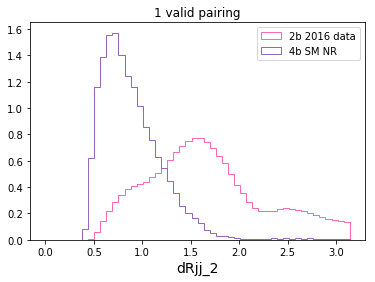

In [12]:
for c,nb,r in zip(cols,nBins,myRanges):
    plt.figure()
    
    plt.hist(data16.loc[bkg_mask & S1,c], nb, r,
             color="hotpink", histtype='step', label='2b 2016 data', density=True)
    
    plt.hist(smnr.loc[(smnr.ntag == 4) & (smnr.nValidPairs == 1) & sig_S1,c], nb, r,
             color="C4", histtype='step', label='4b SM NR', density=True)
    
    plt.xlabel(c,fontsize=14)
    plt.legend()
    plt.title('1 valid pairing')
    plt.savefig('figures/2b_data16_1validPair/{}_S1_smnr.pdf'.format(c),bbox_inches='tight')
    
plt.show()

**Notes:** Ok, so there's a lot of cool stuff going on here! I'm going to save them, start tying to summarize these studies in a talk, and then come back to seeing which **2d** plots I should make!

## 2d distributions

Ok, so I'm seeing some interesting features, and it might be cool to draw them out by comparing the (...) 

**$m_{hh}$ correlation plots**

In [13]:
titles = [r'$\frac{(m_1-137)^2}{20^2} + \frac{(m_1-115)^2}{20^2} < 1$',
          r'$\frac{(m_1-140)^2}{25^2} + \frac{(m_1-62)^2}{13.5^2} < 1$',
          r'$\frac{(m_1-65)^2}{13.5^2} + \frac{(m_1-62)^2}{13.5^2} < 1$']

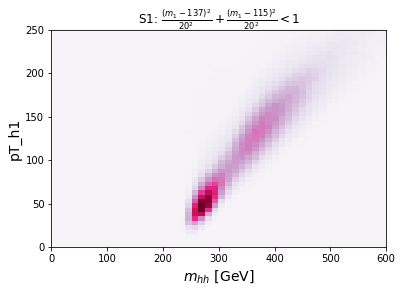

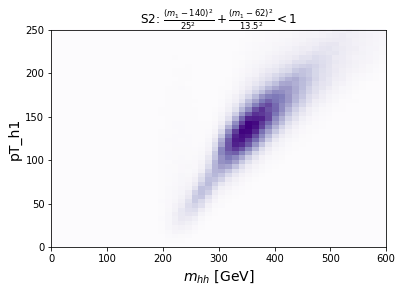

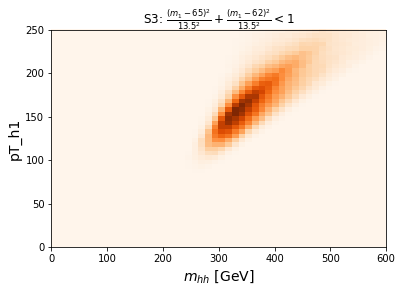

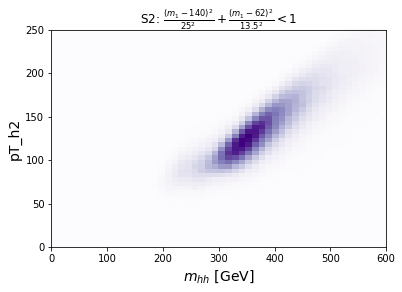

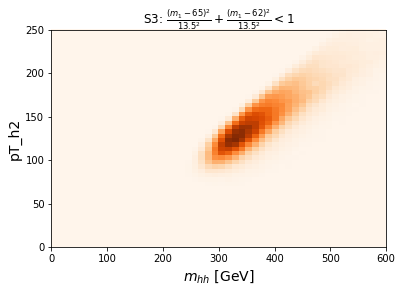

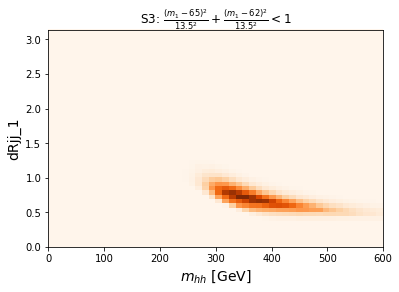

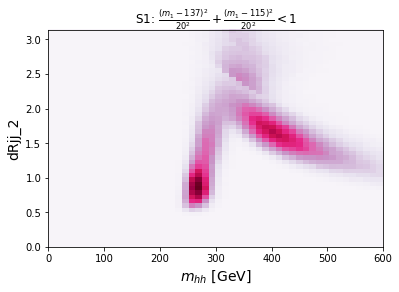

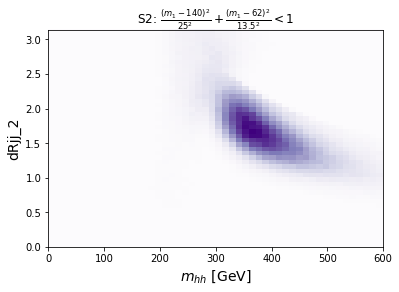

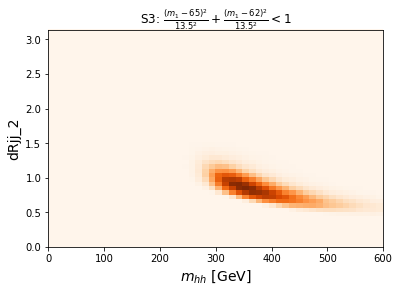

In [14]:
for c, r in zip(['pT_h1','pT_h2','dRjj_1','dRjj_2'], [(0,250)]*2+[(0,np.pi)]*2):

    for si,S,cmap,t in zip([1,2,3],[S1,S2,S3],["PuRd","Purples","Oranges"],titles):  
        
        plt.figure()
        plt.hist2d(data16.loc[bkg_mask & S,'m_hh'],data16.loc[bkg_mask & S,c], 
                   [50]*2, [(0,600),r],
                 cmap=cmap)
        
        plt.xlabel('$m_{hh}$ [GeV]',fontsize=14)
        plt.ylabel(c,fontsize=14)
        plt.title('S{}: '.format(si) + t)
        plt.savefig('figures/2b_data16_1validPair/{}_vs_mhh.pdf'.format(c),bbox_inches='tight')

        plt.show()

There's some very interesting features with this higher mass S1 region.
- It seems like 

And Rafael was right, I think the feature for high $m_{HC1}$ low $m_{HC2}$ can be explained through the same logic / story, because we're seeing a similar feature for S2 as well, just not as prominantly.

**tagged vs not tagged for the jets in the *same* HC**

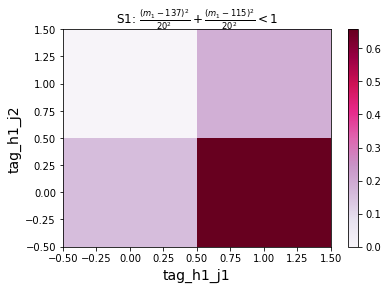

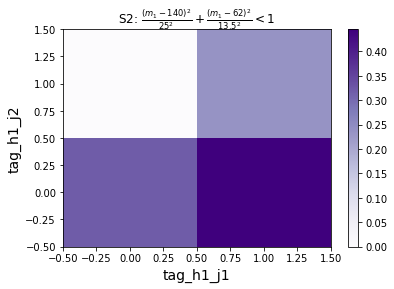

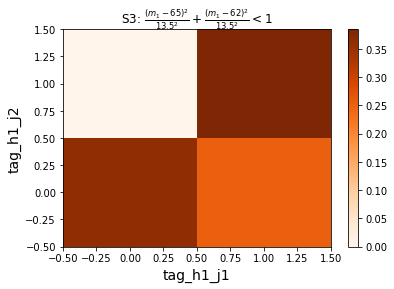

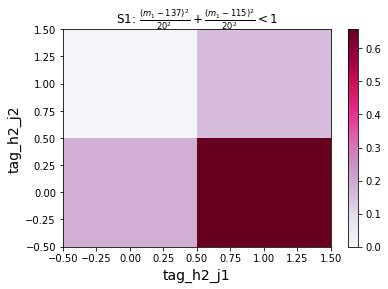

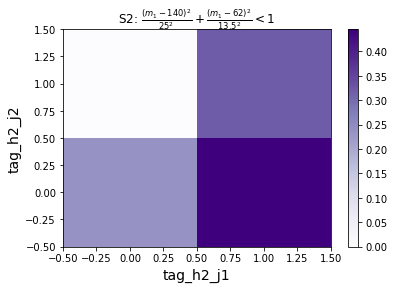

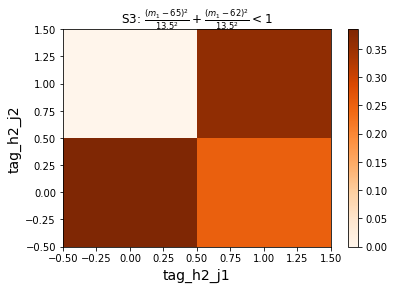

In [15]:
for c1, c2 in [('tag_h1_j1','tag_h1_j2'),('tag_h2_j1','tag_h2_j2')]:
    
    for si,S,cmap,t in zip([1,2,3],[S1,S2,S3],["PuRd","Purples","Oranges"],titles):  
        
        plt.figure()
        plt.hist2d(data16.loc[bkg_mask & S,c1].astype(float),data16.loc[bkg_mask & S,c2].astype(float), 
                   [2]*2, [(-0.5,1.5)]*2, cmap=cmap,normed=True)
        
        plt.xlabel(c1,fontsize=14)
        plt.ylabel(c2,fontsize=14)
        plt.title('S{}: '.format(si) + t)
        plt.colorbar()
        plt.savefig('figures/2b_data16_1validPair/{}_vs_{}.pdf'.format(c2,c1),bbox_inches='tight')

        plt.show()

**Correlation of the jet $p_T$s w/r.t. each other**

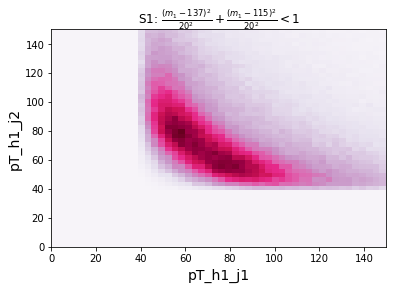

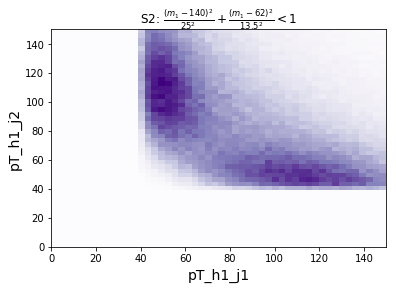

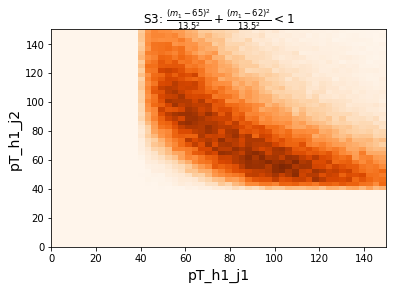

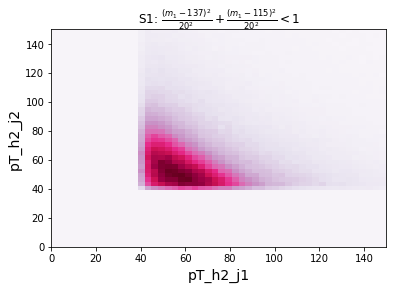

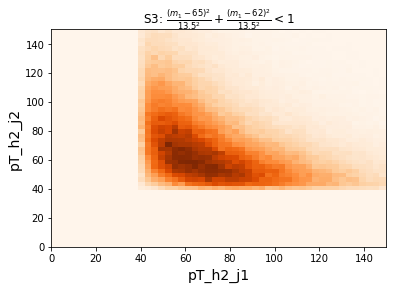

In [16]:
for c1, c2 in [('pT_h1_j1','pT_h1_j2'),('pT_h2_j1','pT_h2_j2')]:
    
    for si,S,cmap,t in zip([1,2,3],[S1,S2,S3],["PuRd","Purples","Oranges"],titles):  
        
        plt.figure()
        plt.hist2d(data16.loc[bkg_mask & S,c1],data16.loc[bkg_mask & S,c2], 
                   [50]*2, [(0,150)]*2,cmap=cmap)
        
        plt.xlabel(c1,fontsize=14)
        plt.ylabel(c2,fontsize=14)
        plt.title('S{}: '.format(si) + t)
        plt.savefig('figures/2b_data16_1validPair/{}_vs_{}.pdf'.format(c2,c1),bbox_inches='tight')
        
        plt.show()

## 2b within a *single* HC

**Lesson:** From the boosted analysis, they saw that that if you require the 2 b-tags to be within the same jet, they model the corresponding properties of the HC in the second jet, so I think this would be an interesting thing to check here as well, especially because we have a lot of cool shit going on here!

Recall: for the boosted analysis, they still needed to reweight the non $b$-tagged HC, but what was kind of a nice feature of this analysis was that they could reweight in the full mass plane.

Let's start off by looking at the full mass plane!


In [17]:
# I'm going to add the contours to the plot too
SR_x = np.linspace(120 / 1.16, 120 / 0.840000000001)
alpha = np.power(10*(SR_x - 120)/SR_x,2)
SR_y1 = 110 / (1 + 0.1 * np.sqrt(np.power(1.6,2) - alpha))
SR_y2 = 110 / (1 - 0.1 * np.sqrt(np.power(1.6,2) - alpha))

CR_x = np.linspace(124-30,124+30)
beta = np.sqrt(30**2 - np.power(CR_x-124, 2))
CR_y1 = 113 + beta
CR_y2 = 113 - beta

SB_x = np.linspace(126-45,126+45)
gamma = np.sqrt(45**2 - np.power(SB_x-126, 2))
SB_y1 = 116 + gamma
SB_y2 = 116 - gamma

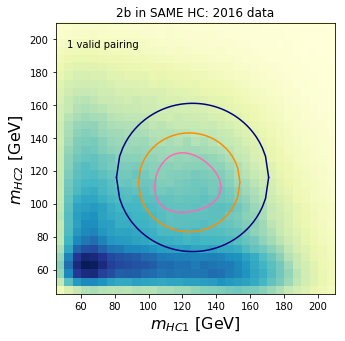

In [19]:
fig, ax = plt.subplots(1,1,figsize=(5,5))

HC1_2b = data16.tag_h1_j1 & data16.tag_h1_j2
HC2_2b = data16.tag_h2_j1 & data16.tag_h2_j2

plt.hist2d(data16.loc[(data16.ntag == 2) & (data16.nValidPairs == 1) & (HC1_2b | HC2_2b),"m_h1"],
           data16.loc[(data16.ntag == 2) & (data16.nValidPairs == 1) & (HC1_2b | HC2_2b),"m_h2"],
           mBins,mhRanges,cmap="YlGnBu")

plt.xlabel('$m_{HC1}$ [GeV]',fontsize=16)
plt.ylabel('$m_{HC2}$ [GeV]',fontsize=16)
plt.text(*loc,"1 valid pairing")
plt.title('2b in SAME HC: 2016 data')

plt.plot(SR_x, SR_y1,'hotpink')
plt.plot(SR_x, SR_y2,'hotpink')

plt.plot(CR_x, CR_y1,'darkorange')
plt.plot(CR_x, CR_y2,'darkorange')

plt.plot(SB_x, SB_y1,'navy')
plt.plot(SB_x, SB_y2,'navy')

plt.savefig('figures/HC2b_data16/massplane_1validPair.pdf',bbox_inches='tight')

plt.show()

Ok, *awesome* now we are seeing this feature of the background looking more monotonic in the single valid pairing category!

Maybe I should also separate out this plot by the # of valid pairings?

In [20]:
N = np.sum((data16.ntag >= 4) & (data16.kinematic_region == 2)) / np.sum(data16.ntag == 2 & (data16.kinematic_region == 2)) 

/cvmfs/sft.cern.ch/lcg/views/LCG_94python3/x86_64-slc6-gcc8-opt/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in long_scalars
  """Entry point for launching an IPython kernel.


In [21]:
output_dir = "../../hh4b-background-estimation/Resolved/myStudies"
yr_short=16
param_label=21
BDT_fname = ("{}/BDT_d24_{}_rel{}.p".format(output_dir,yr_short,param_label))
reweighter = pickle.load(open( BDT_fname, "rb" ))
sort_rw_cols = ['pT_4', 'pT_2', 'eta_i', 'dRjj_1', 'dRjj_2', 'njets']

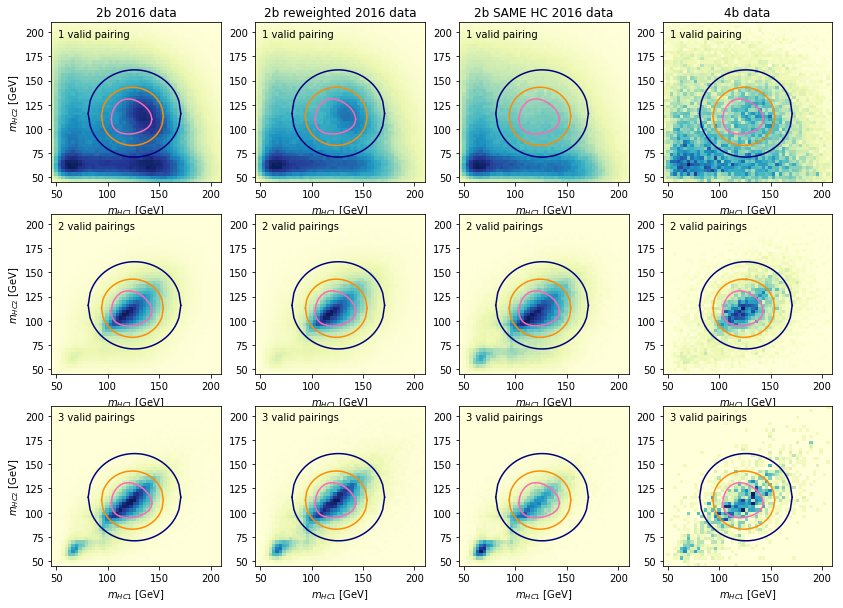

In [22]:
fig, axes = plt.subplots(3,4,figsize=(14,10))

for nv in [1,2,3]:

    mask = (data16.ntag == 2) & (data16.nValidPairs == nv) 
    axes[nv-1,0].hist2d(data16.loc[mask,"m_h1"],data16.loc[mask,"m_h2"],
                        nb,mhRanges,cmap="YlGnBu")

    axes[nv-1,0].set_xlabel('$m_{HC1}$ [GeV]')  
    axes[nv-1,0].set_ylabel('$m_{HC2}$ [GeV]')
    axes[nv-1,0].text(*loc,"{} valid pairing{}".format(nv,"s" if nv !=1 else ''))

    axes[nv-1,0].plot(SR_x, SR_y1,'hotpink')
    axes[nv-1,0].plot(SR_x, SR_y2,'hotpink')

    axes[nv-1,0].plot(CR_x, CR_y1,'darkorange')
    axes[nv-1,0].plot(CR_x, CR_y2,'darkorange')

    axes[nv-1,0].plot(SB_x, SB_y1,'navy')
    axes[nv-1,0].plot(SB_x, SB_y2,'navy')

    axes[nv-1,1].hist2d(data16.loc[mask,"m_h1"],data16.loc[mask,"m_h2"],
                        nb,mhRanges,cmap="YlGnBu",
                        weights=reweighter.predict_weights(data16.loc[mask,sort_rw_cols]))

    axes[nv-1,1].set_xlabel('$m_{HC1}$ [GeV]')
    axes[nv-1,1].text(*loc,"{} valid pairing{}".format(nv,"s" if nv !=1 else ''))

    axes[nv-1,1].plot(SR_x, SR_y1,'hotpink')
    axes[nv-1,1].plot(SR_x, SR_y2,'hotpink')

    axes[nv-1,1].plot(CR_x, CR_y1,'darkorange')
    axes[nv-1,1].plot(CR_x, CR_y2,'darkorange')

    axes[nv-1,1].plot(SB_x, SB_y1,'navy')
    axes[nv-1,1].plot(SB_x, SB_y2,'navy')

    '''
    2b where the bs are required to come from the *same* HC
    '''
    mask = (data16.ntag == 2) & (data16.nValidPairs == nv) & (HC1_2b | HC2_2b)
    axes[nv-1,2].hist2d(data16.loc[mask,"m_h1"],data16.loc[mask,"m_h2"],
                        nb,mhRanges,cmap="YlGnBu")

    axes[nv-1,2].set_xlabel('$m_{HC1}$ [GeV]')
    axes[nv-1,2].text(*loc,"{} valid pairing{}".format(nv,"s" if nv !=1 else ''))

    axes[nv-1,2].plot(SR_x, SR_y1,'hotpink')
    axes[nv-1,2].plot(SR_x, SR_y2,'hotpink')

    axes[nv-1,2].plot(CR_x, CR_y1,'darkorange')
    axes[nv-1,2].plot(CR_x, CR_y2,'darkorange')

    axes[nv-1,2].plot(SB_x, SB_y1,'navy')
    axes[nv-1,2].plot(SB_x, SB_y2,'navy')


    '''
    4b - unblinded
    '''
    mask = (data16.ntag >= 4) & (data16.nValidPairs == nv) # & (data16.kinematic_region != 0)
    axes[nv-1,3].hist2d(data16.loc[mask,"m_h1"],data16.loc[mask,"m_h2"],
                        nb,mhRanges,cmap="YlGnBu")

    axes[nv-1,3].set_xlabel('$m_{HC1}$ [GeV]')
    axes[nv-1,3].text(*loc,"{} valid pairing{}".format(nv,"s" if nv !=1 else ''))

    axes[nv-1,3].plot(SR_x, SR_y1,'hotpink')
    axes[nv-1,3].plot(SR_x, SR_y2,'hotpink')

    axes[nv-1,3].plot(CR_x, CR_y1,'darkorange')
    axes[nv-1,3].plot(CR_x, CR_y2,'darkorange')

    axes[nv-1,3].plot(SB_x, SB_y1,'navy')
    axes[nv-1,3].plot(SB_x, SB_y2,'navy')


# Label the figures
axes[0,0].set_title('2b 2016 data')
axes[0,1].set_title('2b reweighted 2016 data')
axes[0,2].set_title('2b SAME HC 2016 data')
axes[0,3].set_title('4b data')

plt.savefig('figures/massplane_bkgRwt_validPairings.pdf',bbox_inches='tight')

plt.show()

**Next:** Let's look at the combination of this plot for all valid pairings.

In [23]:
fig, axes = plt.subplots(1,4,figsize=(14,3.4))

mask = (data16.ntag == 2) 
axes[0].hist2d(data16.loc[mask,"m_h1"],data16.loc[mask,"m_h2"],
                    nb,mhRanges,cmap="YlGnBu")

axes[0].set_xlabel('$m_{HC1}$ [GeV]')  
axes[0].set_ylabel('$m_{HC2}$ [GeV]')

axes[0].plot(SR_x, SR_y1,'hotpink')
axes[0].plot(SR_x, SR_y2,'hotpink')

axes[0].plot(CR_x, CR_y1,'darkorange')
axes[0].plot(CR_x, CR_y2,'darkorange')

axes[0].plot(SB_x, SB_y1,'navy')
axes[0].plot(SB_x, SB_y2,'navy')

axes[1].hist2d(data16.loc[mask,"m_h1"],data16.loc[mask,"m_h2"],
                    nb,mhRanges,cmap="YlGnBu",
                    weights=reweighter.predict_weights(data16.loc[mask,sort_rw_cols]))

axes[1].set_xlabel('$m_{HC1}$ [GeV]')

axes[1].plot(SR_x, SR_y1,'hotpink')
axes[1].plot(SR_x, SR_y2,'hotpink')

axes[1].plot(CR_x, CR_y1,'darkorange')
axes[1].plot(CR_x, CR_y2,'darkorange')

axes[1].plot(SB_x, SB_y1,'navy')
axes[1].plot(SB_x, SB_y2,'navy')

'''
2b where the bs are required to come from the *same* HC
'''
mask = (data16.ntag == 2) & (HC1_2b | HC2_2b)
axes[2].hist2d(data16.loc[mask,"m_h1"],data16.loc[mask,"m_h2"],
                    nb,mhRanges,cmap="YlGnBu")

axes[2].set_xlabel('$m_{HC1}$ [GeV]')

axes[2].plot(SR_x, SR_y1,'hotpink')
axes[2].plot(SR_x, SR_y2,'hotpink')

axes[2].plot(CR_x, CR_y1,'darkorange')
axes[2].plot(CR_x, CR_y2,'darkorange')

axes[2].plot(SB_x, SB_y1,'navy')
axes[2].plot(SB_x, SB_y2,'navy')


'''
4b - but blinded
'''
mask = (data16.ntag >= 4) #& (data16.kinematic_region != 0)
axes[3].hist2d(data16.loc[mask,"m_h1"],data16.loc[mask,"m_h2"],
                    nb,mhRanges,cmap="YlGnBu")

axes[3].set_xlabel('$m_{HC1}$ [GeV]')

axes[3].plot(SR_x, SR_y1,'hotpink')
axes[3].plot(SR_x, SR_y2,'hotpink')

axes[3].plot(CR_x, CR_y1,'darkorange')
axes[3].plot(CR_x, CR_y2,'darkorange')

axes[3].plot(SB_x, SB_y1,'navy')
axes[3].plot(SB_x, SB_y2,'navy')


# Label the figures
axes[0].set_title('2b 2016 data')
axes[1].set_title('2b reweighted 2016 data')
axes[2].set_title('2b SAME HC 2016 data')
axes[3].set_title('4b data')

plt.savefig('figures/massplane_bkgRwt.pdf',bbox_inches='tight')

plt.show()

*What do I want to show?* That the kinematic properties of the $b$-tagged HC in 2b match the kinematic properties of the corresponding HC in 4b. I think if this is true, then we can *completely* derive a background estimate in 2b? Actually... I'm not sure, but worth a check. 

**I think I really need to read this section of the boosted int note!!**

Maybe I should start off by checking the 2b and 4b distributions in the SB (or just outside of the SR) because then I could have some cool stuff to show!

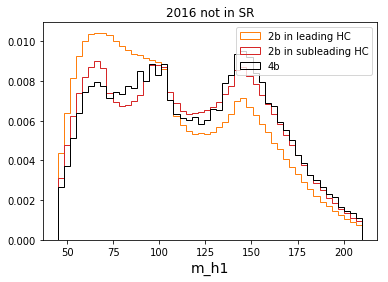

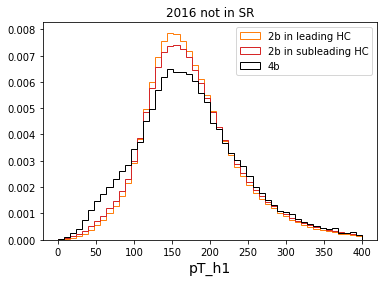

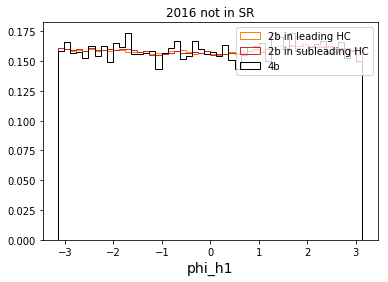

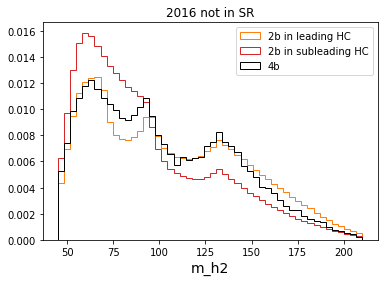

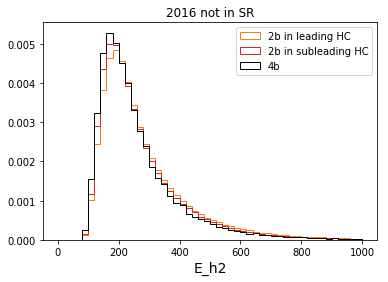

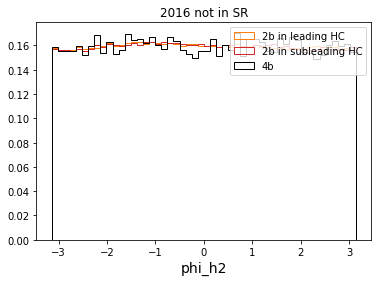

In [24]:
for c,r in zip(['m_h1','E_h1','pT_h1','eta_h1','phi_h1','m_h2','E_h2','pT_h2','eta_h2','phi_h2'],
               [mhRanges[0],(0,1000),(0,400),(-2.5,2.5),(-np.pi,np.pi)]*2):
    
    plt.figure()

    plt.hist(data16.loc[(data16.ntag == 2) & HC1_2b & (data16.kinematic_region != 0),c], 50, r,
             color='C1', histtype='step', label='2b in leading HC', density=True)
    
    plt.hist(data16.loc[(data16.ntag == 2) & HC2_2b & (data16.kinematic_region != 0),c], 50, r,
             color='C3', histtype='step', label='2b in subleading HC', density=True)
    
    plt.hist(data16.loc[(data16.ntag >= 4) & (data16.kinematic_region != 0),c], 50, r,
             color='black', histtype='step', label='4b', density=True)
    
    plt.title('2016 not in SR')
    plt.xlabel(c,fontsize=14)
    plt.legend()
    plt.savefig('figures/HC2b_data16/{}_notSR.pdf'.format(c),bbox_inches='tight')
    
plt.show()

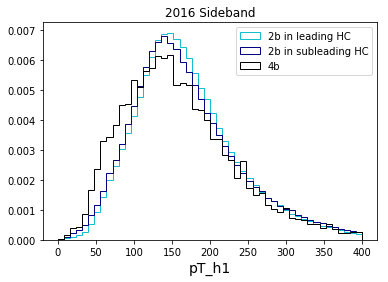

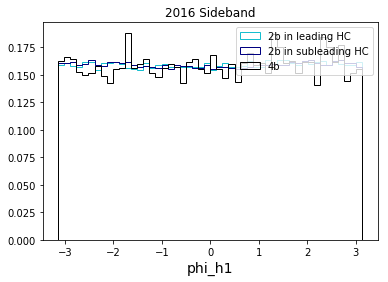

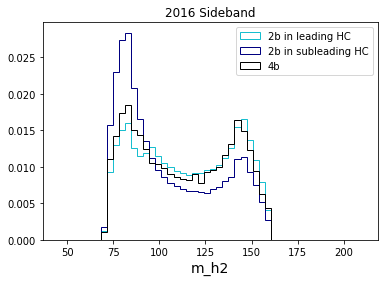

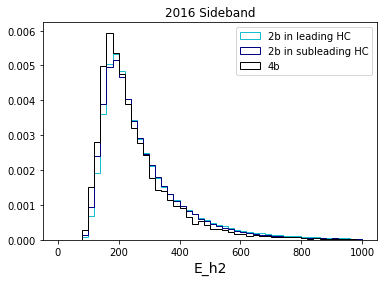

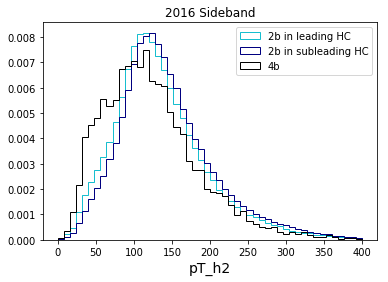

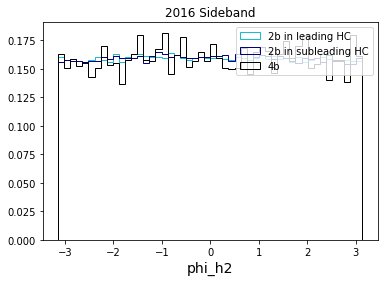

In [26]:
for c,r in zip(['m_h1','E_h1','pT_h1','eta_h1','phi_h1','m_h2','E_h2','pT_h2','eta_h2','phi_h2'],
               [mhRanges[0],(0,1000),(0,400),(-2.5,2.5),(-np.pi,np.pi)]*2):
    
    plt.figure()
    
       
    plt.hist(data16.loc[(data16.ntag == 2) & HC1_2b & (data16.kinematic_region == 2),c], 50, r,
             color='C9', histtype='step', label='2b in leading HC', density=True)
    
    plt.hist(data16.loc[(data16.ntag == 2) & HC2_2b & (data16.kinematic_region == 2),c], 50, r,
             color='navy', histtype='step', label='2b in subleading HC', density=True)
    
    plt.hist(data16.loc[(data16.ntag >= 4) & (data16.kinematic_region == 2),c], 50, r,
             color='black', histtype='step', label='4b', density=True)
    
    plt.title('2016 Sideband')
    plt.xlabel(c,fontsize=14)
    plt.legend()
    plt.savefig('figures/HC2b_data16/{}_SB.pdf'.format(c),bbox_inches='tight')
    
    plt.show()

Ok, I could follow-up with how these distributions look if I instead looked at ordered by the HC $p_T$ instead of the scalar sum of the constituent jets, but I think the distributions are different enough that this won't make much of a difference.